# 2 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
    * [2.4.1 Listing Price](#2.4.1_Listing_Price)

## 2.2 Introduction<a id='2.2_Introduction'></a>

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from scipy import stats
from datetime import date

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [2]:
SingleFamilyHome = pd.read_csv('../data/processed/SingleFamily.csv')

In [3]:
SingleFamilyHome.head()

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
0,['https://photos.harstatic.com/189115929/hr/im...,364990.0,1735 Eado Point Lane,Houston,77003.0,Harris County,LT 17 BLK 2 EADO POINT,3,3.0,Contemporary/Modern,...,2018.0,1485.0,217000.0,192.51,2169.0,2.6554,430.0,3,1,1195.0
1,['https://photos.harstatic.com/188179029/hr/im...,419000.0,619 Live Oak Street,Houston,77003.0,Harris County,LT 7 BLK 1 CAPITOL OAKS SEC 3 RP NO 1,3,3.0,Traditional,...,2012.0,1563.0,443500.0,200.05,9768.0,2.5466,320.0,3,1,2244.0
2,['https://photos.harstatic.com/189915458/hr/im...,289900.0,1737 Aden Drive,Houston,77003.0,Harris County,"Lot 59, Block 1",2,2.0,Other,...,2005.0,1904.0,259000.0,181.62,6685.4,2.5465,330.0,2,0,1500.0
3,['https://photos.harstatic.com/190529396/hr/im...,284900.0,1773 Aden Drive,Houston,77003.0,Harris County,LT 90 BLK 1 MIDTOWN VILLAGE,2,2.0,Traditional,...,2005.0,1904.0,259000.0,181.62,6299.0,2.5466,282.0,2,1,1400.0
4,['https://photos.harstatic.com/191047437/hr/im...,399900.0,602 Nagle Street,Houston,77003.0,Harris County,LT 18 BLK 1 CAPITOL OAKS SEC 3 RP NO 1,3,3.0,Contemporary/Modern,...,2012.0,1563.0,443500.0,200.05,10964.0,2.5466,584.0,3,1,2250.0


In [4]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           4805 non-null   object 
 1   ListingPrice         4805 non-null   float64
 2   Address              4805 non-null   object 
 3   City                 4805 non-null   object 
 4   ZipCode              4805 non-null   float64
 5   County               4805 non-null   object 
 6   Legal                4805 non-null   object 
 7   NoBed                4805 non-null   int64  
 8   Stories              4805 non-null   float64
 9   Style                4805 non-null   object 
 10  YearBuilt            4805 non-null   int64  
 11  BuildSqft            4805 non-null   int64  
 12  LotSize              4805 non-null   float64
 13  Fireplace            4805 non-null   int64  
 14  Heating              4805 non-null   object 
 15  Cooling              4805 non-null   o

In [5]:
SingleFamilyHome.shape

(4805, 56)

There are some features with Yes and No category lets transfer them to 1 and 0 which 1 is Yes and 0 for No.

In [6]:
SingleFamilyHome = SingleFamilyHome.replace(to_replace = ['Yes','No'],value = [1,0])

In [7]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           4805 non-null   object 
 1   ListingPrice         4805 non-null   float64
 2   Address              4805 non-null   object 
 3   City                 4805 non-null   object 
 4   ZipCode              4805 non-null   float64
 5   County               4805 non-null   object 
 6   Legal                4805 non-null   object 
 7   NoBed                4805 non-null   int64  
 8   Stories              4805 non-null   float64
 9   Style                4805 non-null   object 
 10  YearBuilt            4805 non-null   int64  
 11  BuildSqft            4805 non-null   int64  
 12  LotSize              4805 non-null   float64
 13  Fireplace            4805 non-null   int64  
 14  Heating              4805 non-null   object 
 15  Cooling              4805 non-null   o

Zip code should be categorical not int64

In [8]:
SingleFamilyHome.ZipCode = SingleFamilyHome.ZipCode.astype('object',copy=False)

In [9]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4805 entries, 0 to 4804
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           4805 non-null   object 
 1   ListingPrice         4805 non-null   float64
 2   Address              4805 non-null   object 
 3   City                 4805 non-null   object 
 4   ZipCode              4805 non-null   object 
 5   County               4805 non-null   object 
 6   Legal                4805 non-null   object 
 7   NoBed                4805 non-null   int64  
 8   Stories              4805 non-null   float64
 9   Style                4805 non-null   object 
 10  YearBuilt            4805 non-null   int64  
 11  BuildSqft            4805 non-null   int64  
 12  LotSize              4805 non-null   float64
 13  Fireplace            4805 non-null   int64  
 14  Heating              4805 non-null   object 
 15  Cooling              4805 non-null   o

In [10]:
categorical=[]
numerical=[]
for i in range(SingleFamilyHome.columns.size):
    if SingleFamilyHome.iloc[:,i].dtype=="object":
        categorical.append(SingleFamilyHome.columns[i])
    else:
        numerical.append(SingleFamilyHome.columns[i])

## 2.5 Numerical Variables<a id='2.5_Numerical_Variables'></a>

First lets look at numerical variables to see what are their statistics summary, correlation and their distribution

### 2.5.1 Listing Price<a id='2.4.1_Listing_Price'></a>

In [11]:
SingleFamilyHome.ListingPrice.describe()

count    4.805000e+03
mean     5.577344e+05
std      6.746800e+05
min      4.700000e+04
25%      2.499000e+05
50%      3.650000e+05
75%      5.995000e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

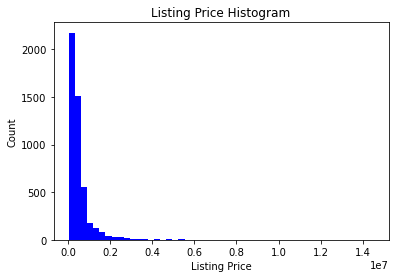

In [12]:
plt.hist(SingleFamilyHome.ListingPrice,bins=50, color='blue')
plt.xlabel('Listing Price')
plt.ylabel('Count')
plt.title('Listing Price Histogram')

plt.show()

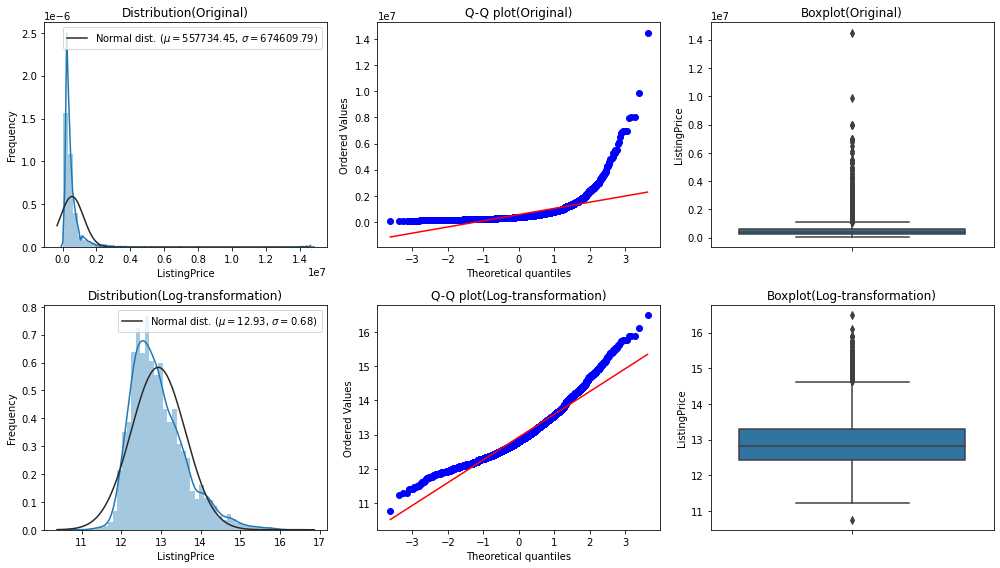

In [13]:
fig, ax = plt.subplots(2,3, figsize=(14,8))
##### Original
# histgram
sns.distplot(SingleFamilyHome['ListingPrice'] , fit=norm, ax=ax[0,0])
mu, sigma = norm.fit(SingleFamilyHome['ListingPrice'])
ax[0,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Distribution(Original)')
# Q-Q plot
_ = stats.probplot(SingleFamilyHome['ListingPrice'], plot=ax[0,1])
ax[0,1].set_title('Q-Q plot(Original)')
# plot boxplot
sns.boxplot(SingleFamilyHome['ListingPrice'] , orient='v', ax=ax[0,2])
ax[0,2].set_title('Boxplot(Original)')

##### Log-transformation
logged = np.log1p(SingleFamilyHome['ListingPrice'])
# histgram
sns.distplot(logged , fit=norm, ax=ax[1,0])
mu, sigma = norm.fit(logged)
ax[1,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Distribution(Log-transformation)')
# Q-Q plot
_ = stats.probplot(logged, plot=ax[1,1])
ax[1,1].set_title('Q-Q plot(Log-transformation)')
# plot boxplot
sns.boxplot(logged , orient='v', ax=ax[1,2])
ax[1,2].set_title('Boxplot(Log-transformation)')

fig.tight_layout()

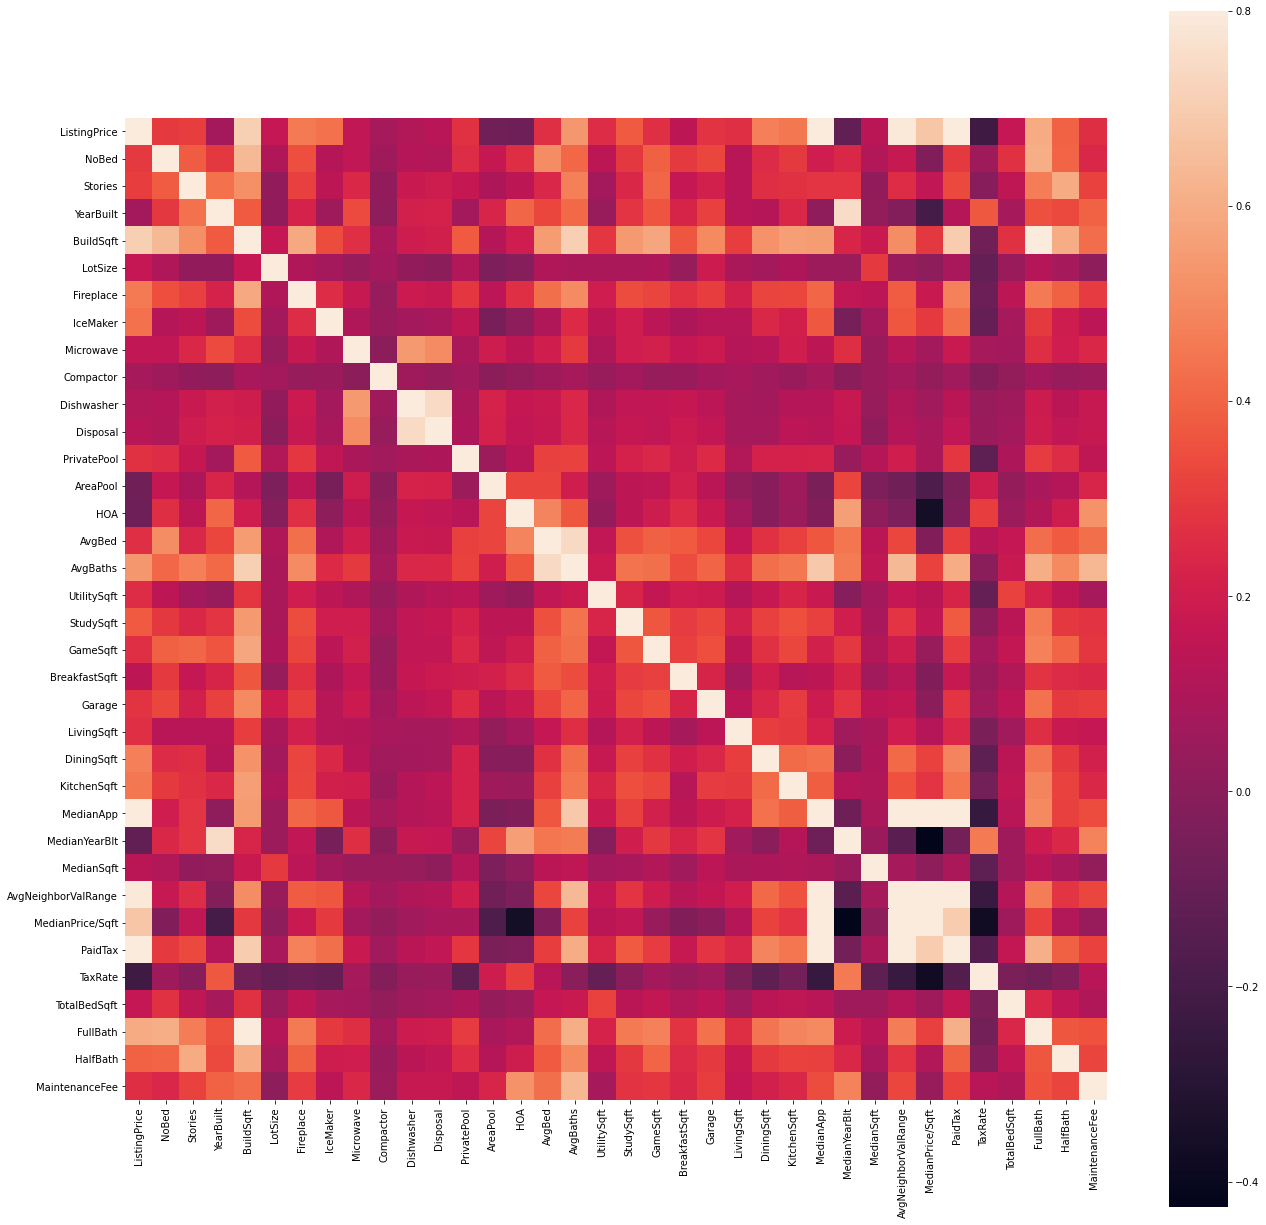

In [14]:
corr = SingleFamilyHome.select_dtypes(include=['float64', 'int64']).iloc[:,0:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [15]:
# Correlation between attributes with SalePrice
corr_list = corr['ListingPrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

PaidTax                0.908461
MedianApp              0.813353
AvgNeighborValRange    0.787182
BuildSqft              0.708088
MedianPrice/Sqft       0.678041
FullBath               0.597322
AvgBaths               0.540634
DiningSqft             0.471480
Fireplace              0.455766
KitchenSqft            0.453242
IceMaker               0.431734
HalfBath               0.397494
StudySqft              0.378228
Stories                0.302040
NoBed                  0.295204
Garage                 0.277697
PrivatePool            0.270910
GameSqft               0.266523
AvgBed                 0.266175
LivingSqft             0.264903
MaintenanceFee         0.263546
UtilitySqft            0.254762
LotSize                0.167195
TotalBedSqft           0.166207
Microwave              0.157956
BreakfastSqft          0.146578
MedianSqft             0.138225
Disposal               0.132298
Dishwasher             0.112682
Compactor              0.081460
YearBuilt              0.072377
AreaPool

Listing price is highly correlated to Median appraisal followed by neighborhood max and min range. 

In [16]:
high_correlated_features = ['MedianApp','AvgNeighborValRange','MedianPrice/Sqft','PaidTax',
                            'FullBath','BuildSqft','AvgBaths']

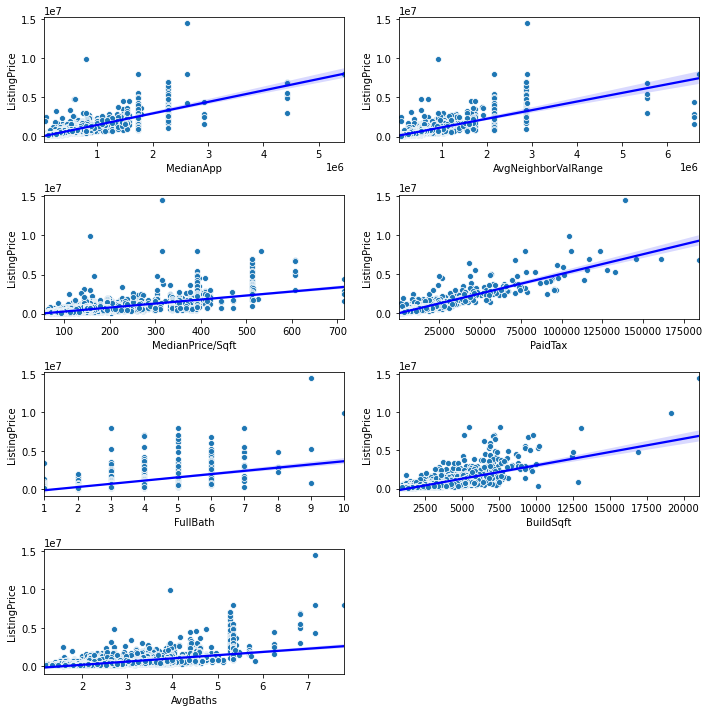

In [17]:
'''Plot appropriate graphs to comprehend the relationship'''
fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=4)
for i , var in enumerate(high_correlated_features):
    ax_i = fig.add_subplot(spec[i])
    sns.scatterplot(x=var, y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
    sns.regplot(x=var, y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')
    ax_i=plt.gca()
plt.tight_layout()
plt.show()


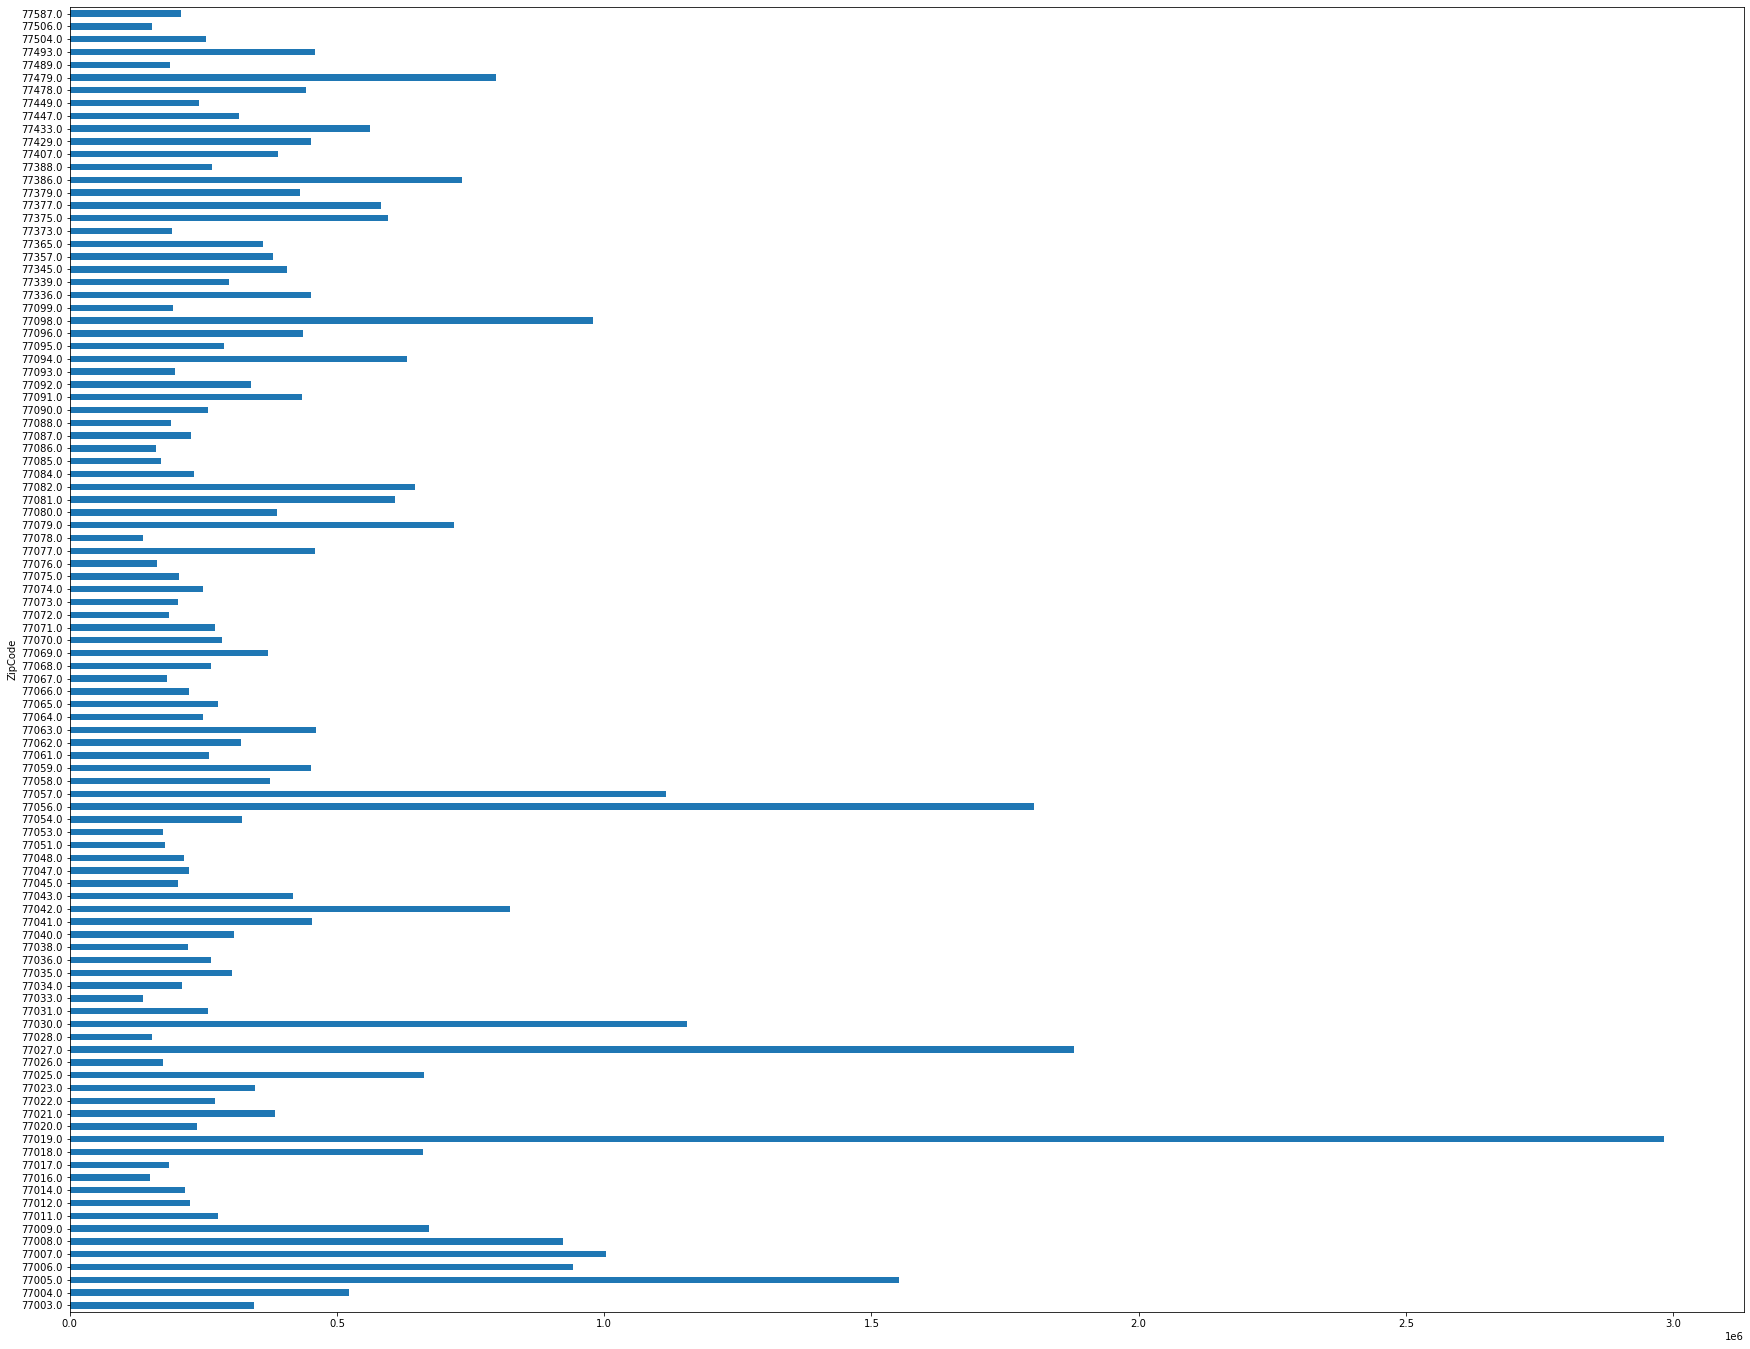

In [18]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].mean().plot(kind='barh')

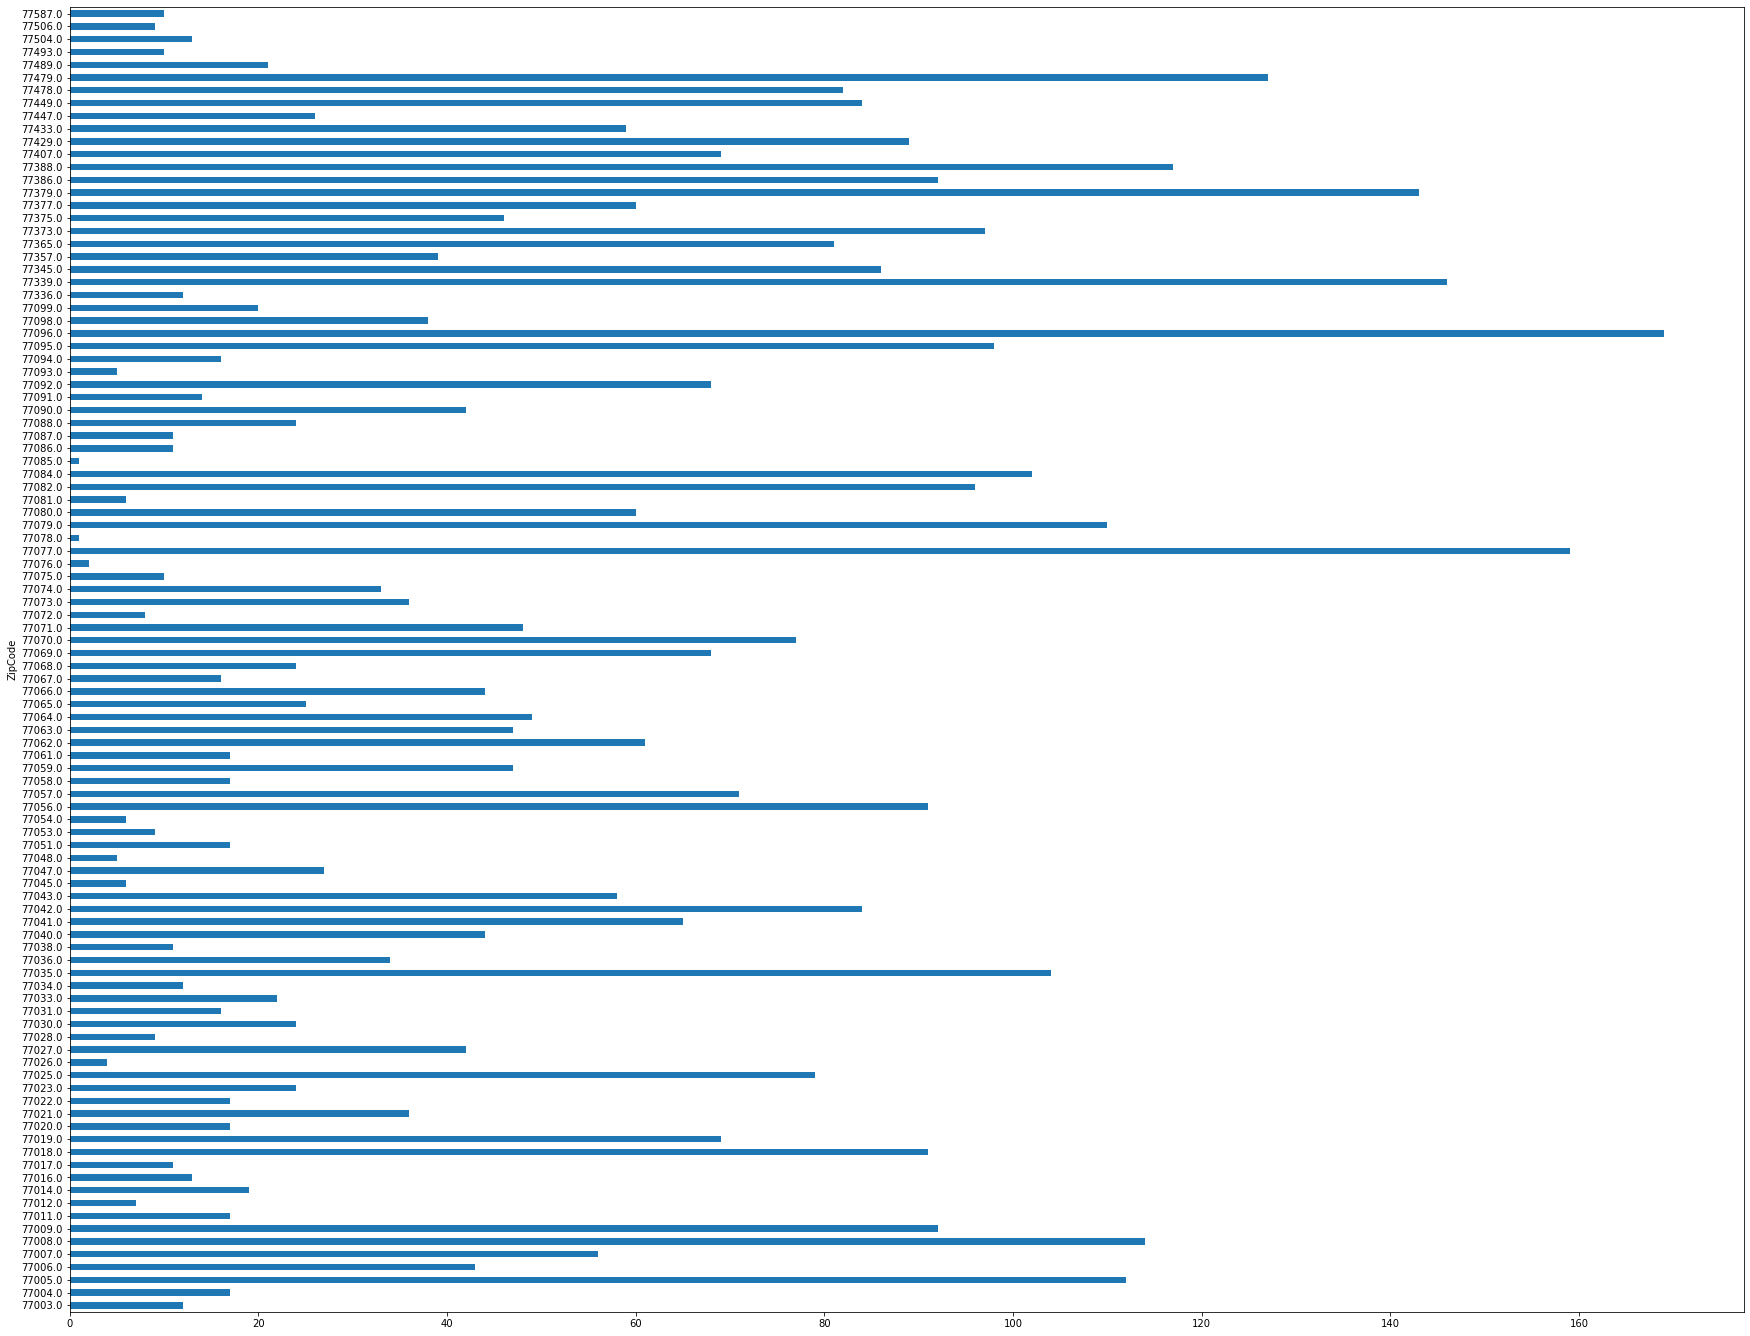

In [20]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].count().plot(kind='barh')

Zip code 77019 has highest average price which includes one of the most expensive are in TX called `River Oak`.

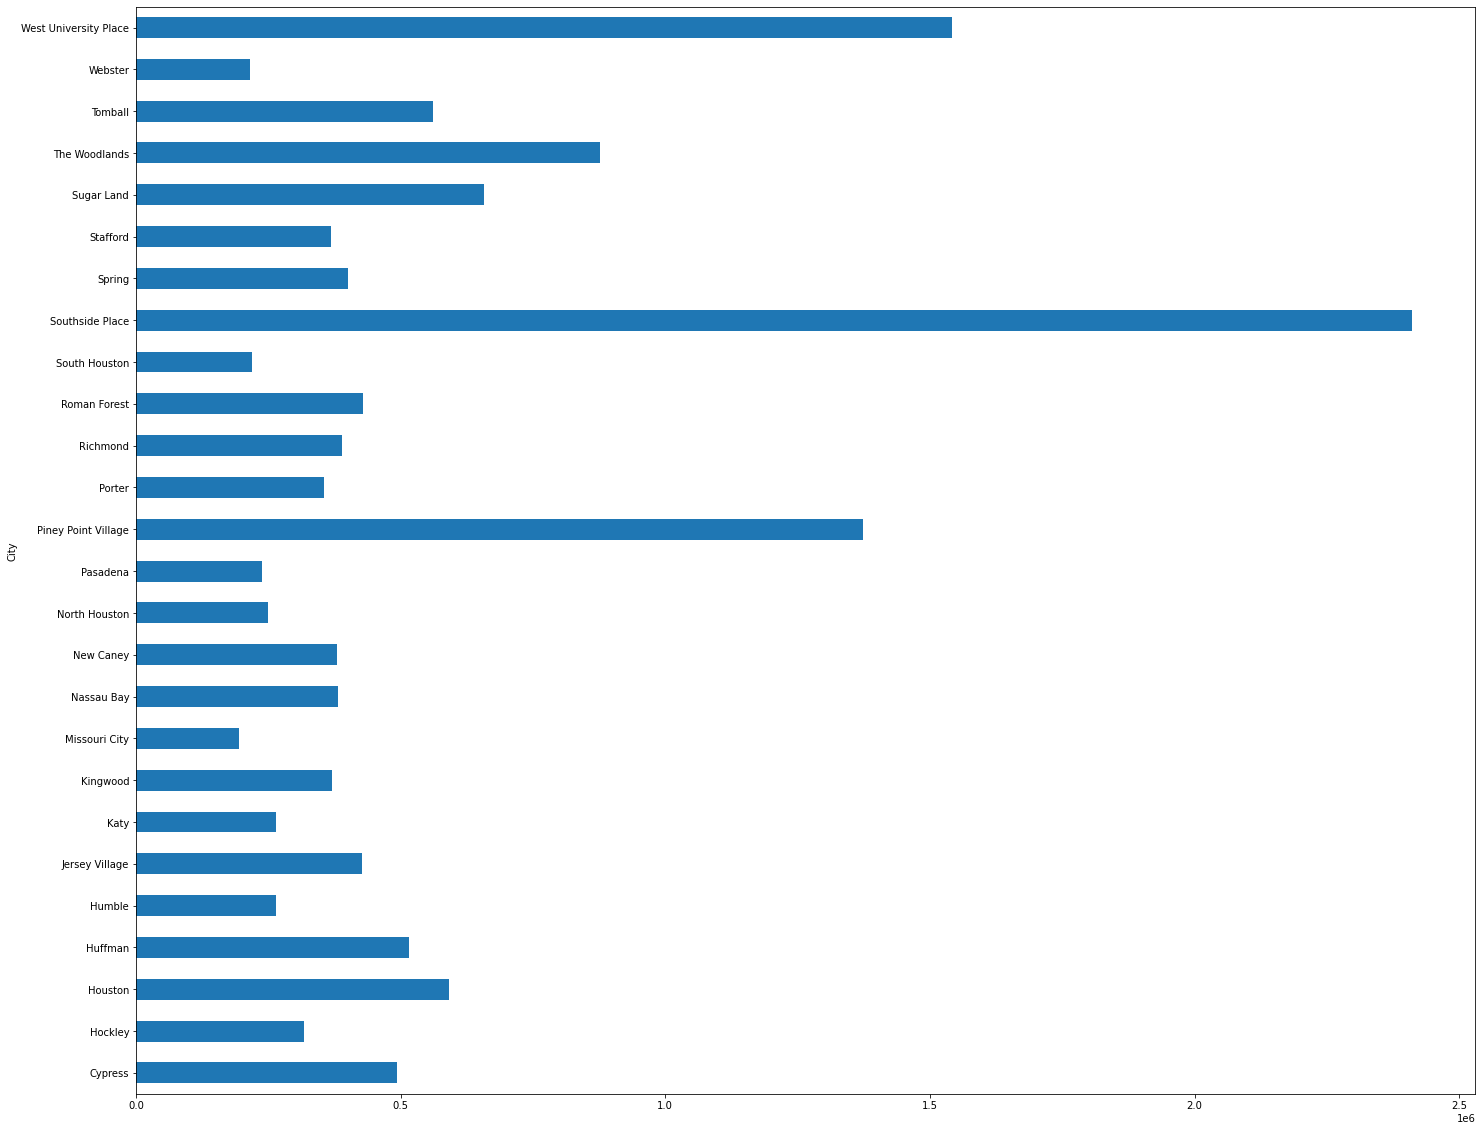

In [21]:
plt.figure(figsize=(24,20))
SingleFamilyHome.groupby('City')['ListingPrice'].mean().plot(kind='barh')

Surprisingly price average for houses in southside place is higher than other cities. lets take a look at these area:

In [22]:
SingleFamilyHome[SingleFamilyHome.City == 'Southside Place']

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
53,['https://photos.harstatic.com/189052667/hr/im...,1895000.0,3775 Elmora Street,Southside Place,77005,Harris County,LT 40 BLK 5 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992.0,7750.0,1642500.0,410.13,35411.000000,2.1724,784.0,4,1,0.0
56,['https://photos.harstatic.com/190418429/hr/im...,1799000.0,6357 Edloe Street,Southside Place,77005,Harris County,LT 40 & TR 41A BLK 1 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992.0,7750.0,1642500.0,410.13,33164.000000,2.1724,826.0,3,1,0.0
66,['https://photos.harstatic.com/191471051/hr/im...,1398000.0,3743 Carlon Street,Southside Place,77005,Harris County,LT 32 BLK 3 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992.0,7750.0,1642500.0,410.13,30898.000000,2.1724,737.0,2,1,0.0
84,['https://photos.harstatic.com/189115448/hr/im...,4549000.0,3745 Farber Street,Southside Place,77005,Harris County,LT 22 BLK 6 SOUTHSIDE PLACE,5,2.0,Traditional,...,1992.0,7750.0,1642500.0,410.13,26606.142857,2.1724,1031.0,6,3,0.0


There are 4 houses with the price more than \\$1.5 million. 

In [23]:
SingleFamilyHome.groupby('City')['ListingPrice'].count()

City
Cypress                   149
Hockley                    25
Houston                  3322
Huffman                     9
Humble                      3
Jersey Village             16
Katy                       94
Kingwood                  121
Missouri City              13
Nassau Bay                 10
New Caney                  38
North Houston               1
Pasadena                   28
Piney Point Village         1
Porter                     76
Richmond                   69
Roman Forest                1
South Houston               9
Southside Place             4
Spring                    450
Stafford                    1
Sugar Land                209
The Woodlands               6
Tomball                    99
Webster                     2
West University Place      49
Name: ListingPrice, dtype: int64

In [24]:
SingleFamilyHome.groupby('SubName')['ListingPrice'].count().sort_values()

SubName
yorkshire sec 02 r/p                  1
santa rosa sec 02                     1
santa rosa                            1
sand crk village sec 02 reserve g     1
hearthstone green sec 04              1
                                     ..
tanglewood                           28
riverstone                           30
royal oaks country club              33
river oaks                           35
houston heights                      77
Name: ListingPrice, Length: 1855, dtype: int64

In [25]:
np.sum(SingleFamilyHome.groupby('SubName')['ListingPrice'].count() ==1)

854

In [26]:
SingleFamilyHome.describe()

,ListingPrice,NoBed,Stories,YearBuilt,BuildSqft,LotSize,Fireplace,IceMaker,Microwave,Compactor,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
count,4.805000e+03,4805.000000,4805.000000,4805.000000,4805.000000,4.805000e+03,4805.000000,4805.000000,4805.000000,4805.000000,...,4805.000000,4805.000000,4.805000e+03,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000
mean,5.577344e+05,3.752966,1.620187,1984.541103,2916.905307,1.169294e+04,0.872633,0.058689,0.727159,0.023933,...,1980.740895,10028.735692,4.376142e+05,157.912788,11382.551675,2.608279,692.059100,2.600416,0.664100,600.325078
std,6.746800e+05,0.814851,0.576359,24.372368,1370.351881,3.258404e+04,0.676729,0.235066,0.445466,0.152858,...,23.431861,18227.118123,4.822050e+05,89.271653,12086.382348,0.295072,700.557109,0.960805,0.615146,672.949325
min,4.700000e+04,1.000000,1.000000,1875.000000,680.000000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,1902.000000,1375.000000,4.700000e+04,55.370000,284.000000,0.610000,3.000000,1.000000,0.000000,0.000000
25%,2.499000e+05,3.000000,1.000000,1967.000000,2020.000000,6.600000e+03,0.000000,0.000000,0.000000,0.000000,...,1962.000000,6617.000000,2.000000e+05,99.080000,5476.000000,2.421600,500.400000,2.000000,0.000000,0.000000
50%,3.650000e+05,4.000000,2.000000,1986.000000,2620.000000,8.396000e+03,1.000000,0.000000,1.000000,0.000000,...,1982.000000,8280.000000,3.075000e+05,124.840000,7929.000000,2.529300,638.000000,2.000000,1.000000,455.000000
75%,5.995000e+05,4.000000,2.000000,2006.000000,3502.000000,1.039900e+04,1.000000,0.000000,1.000000,0.000000,...,2002.000000,9617.000000,5.115000e+05,181.270000,12653.000000,2.738100,795.500000,3.000000,1.000000,800.000000
max,1.450000e+07,10.000000,3.000000,2019.000000,21032.000000,1.306800e+06,5.000000,1.000000,1.000000,1.000000,...,2019.000000,903156.000000,6.697000e+06,715.670000,183920.000000,3.902600,37900.861111,10.000000,6.000000,4320.000000


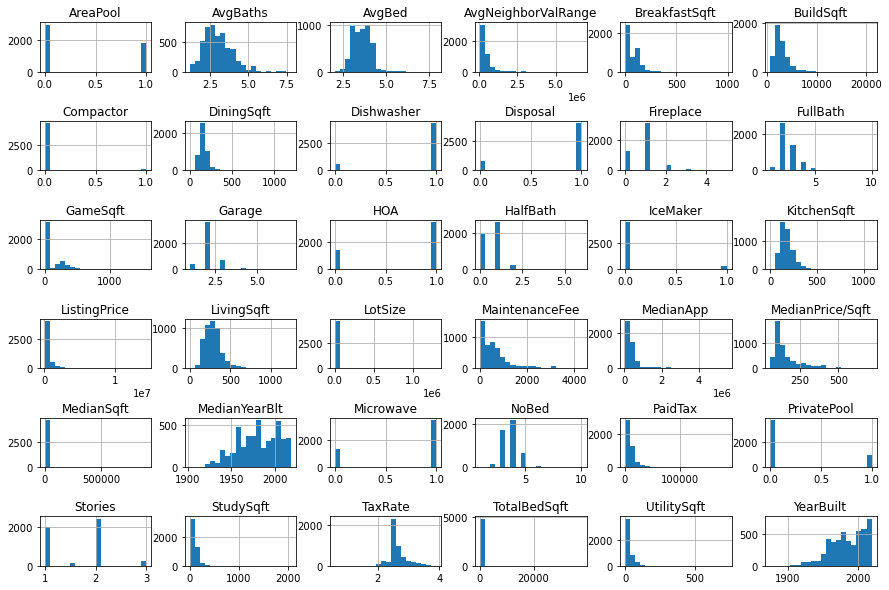

In [27]:
SingleFamilyHome.hist(figsize=(15,10),bins=20)
plt.subplots_adjust(hspace=1)

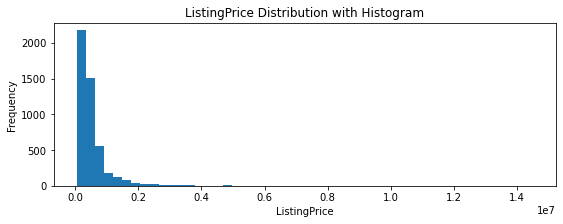

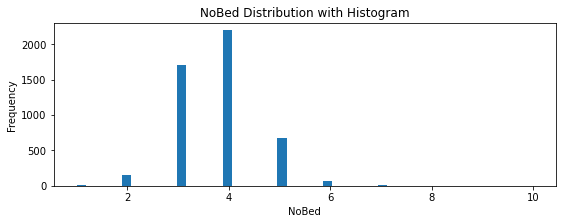

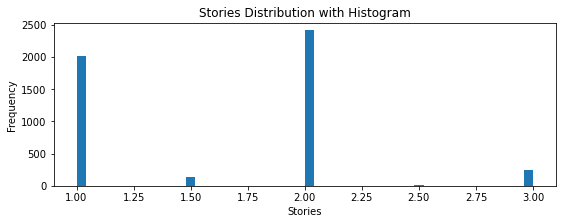

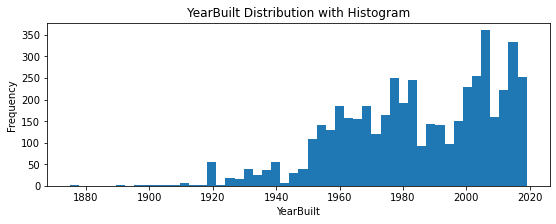

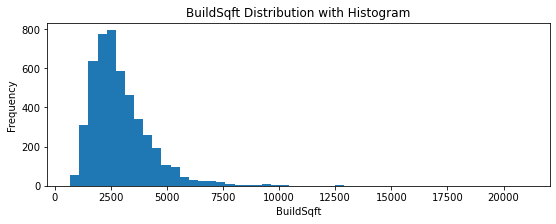

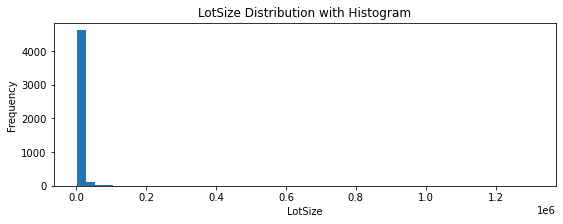

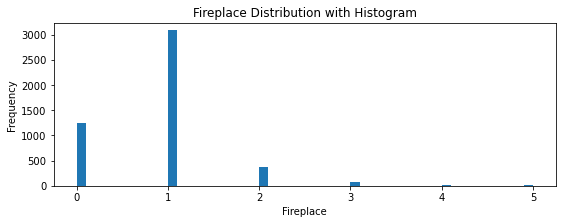

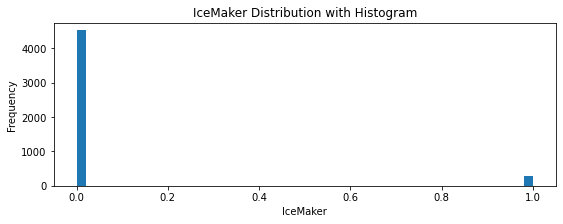

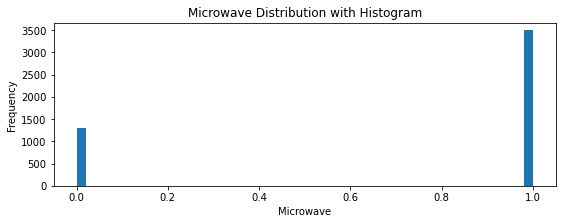

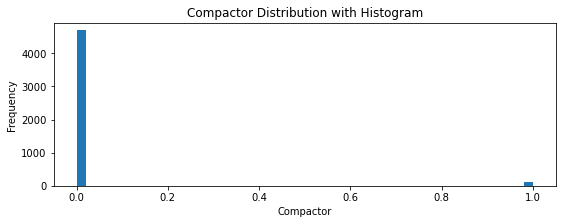

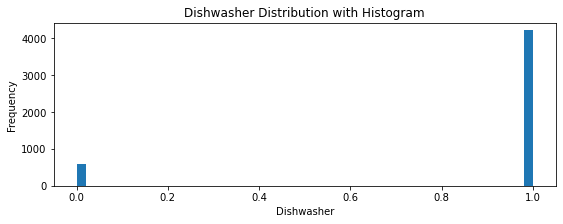

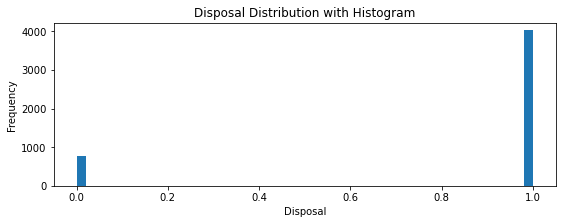

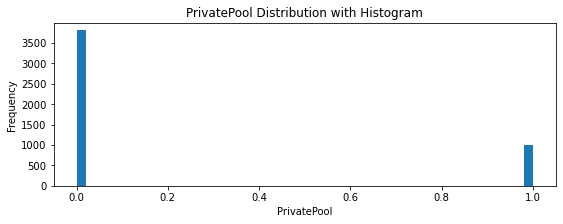

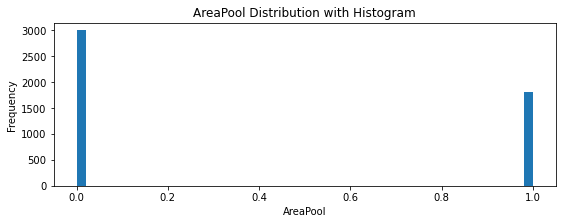

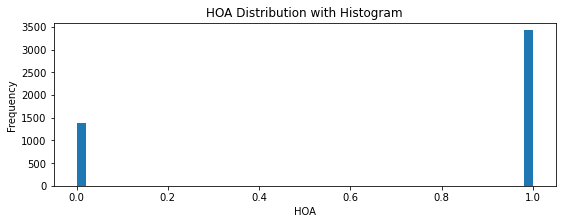

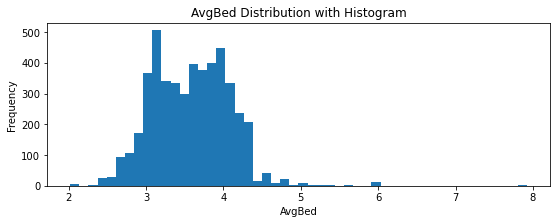

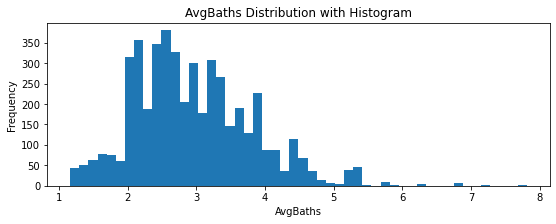

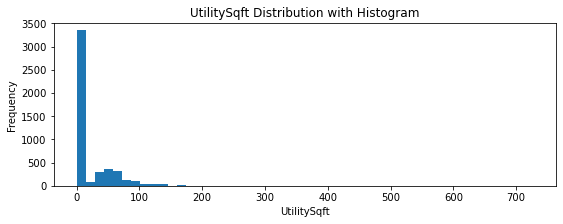

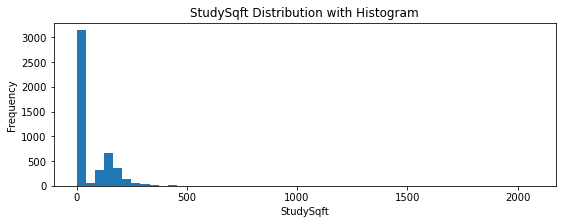

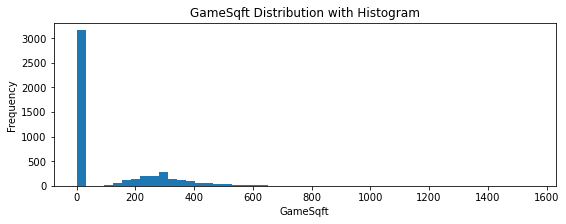

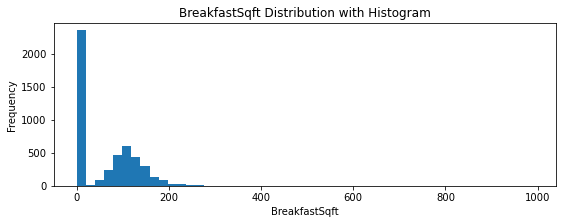

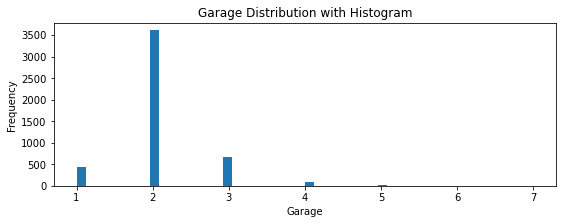

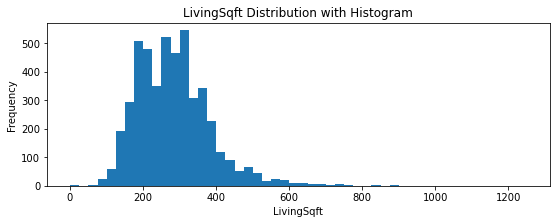

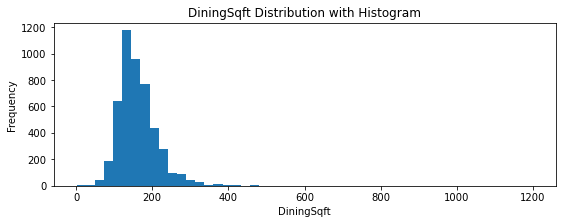

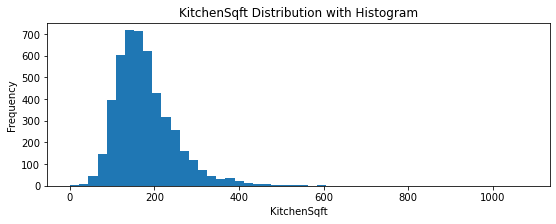

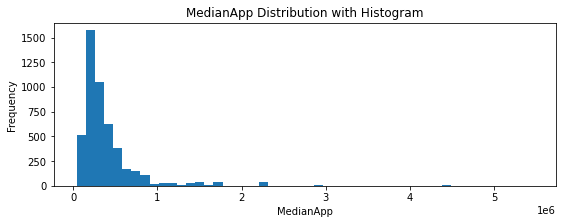

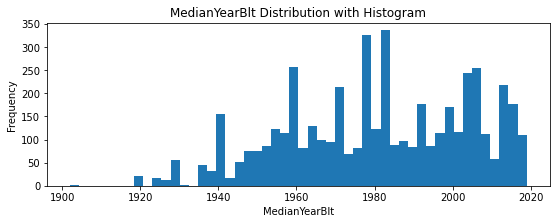

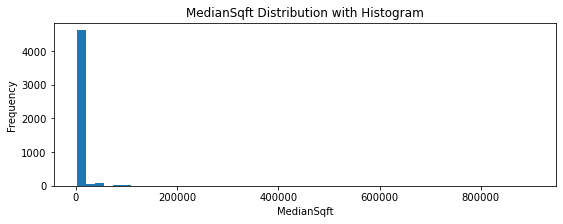

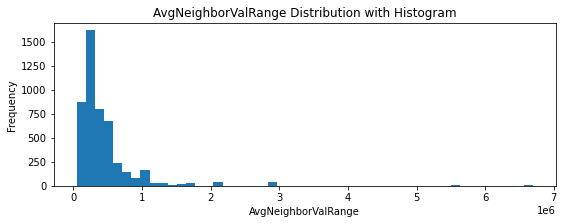

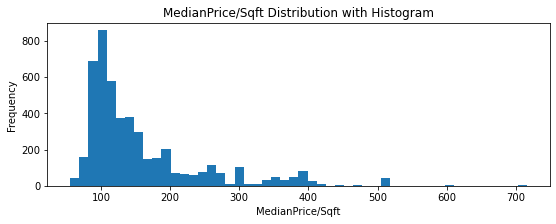

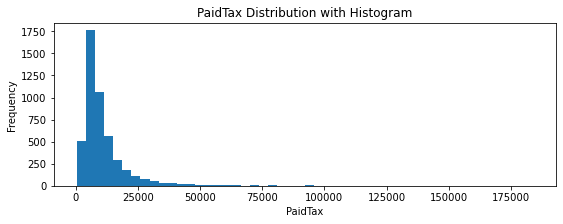

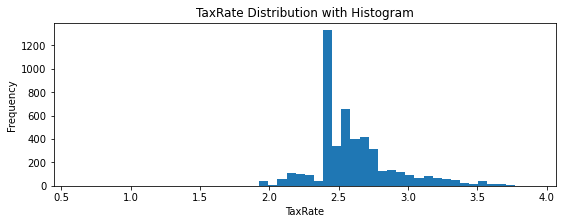

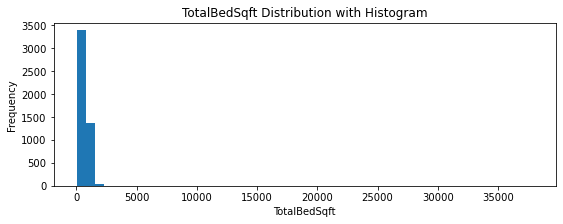

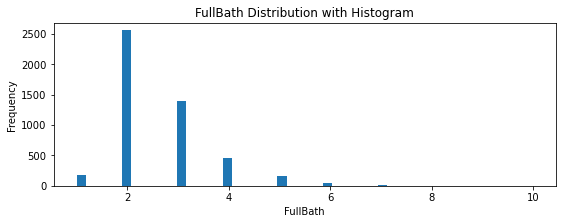

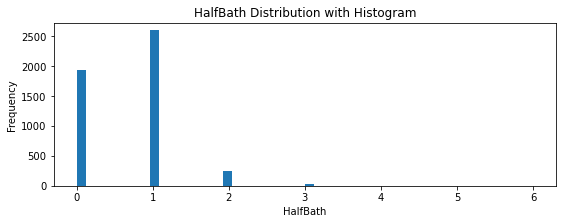

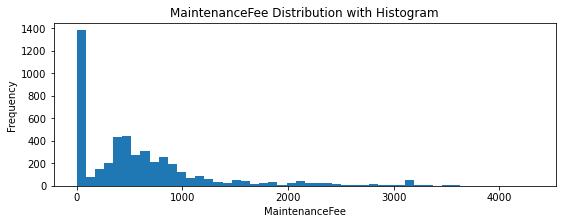

In [28]:
def plot_hist(variable):
    """This function craets histogram for passed in variabled"""
    plt.figure(figsize=(9,3))
    plt.hist(SingleFamilyHome[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
for i in numerical:
    plot_hist(i)

### 2.5.2 Year Built and Median Year Built<a id='2.5.2_Year_Built_and_Median_Year_Built'></a>

In [29]:
SingleFamilyHome.YearBuilt.describe()

count    4805.000000
mean     1984.541103
std        24.372368
min      1875.000000
25%      1967.000000
50%      1986.000000
75%      2006.000000
max      2019.000000
Name: YearBuilt, dtype: float64

In [30]:
SingleFamilyHome.MedianYearBlt.describe()

count    4805.000000
mean     1980.740895
std        23.431861
min      1902.000000
25%      1962.000000
50%      1982.000000
75%      2002.000000
max      2019.000000
Name: MedianYearBlt, dtype: float64

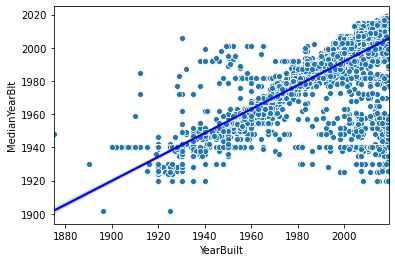

In [31]:
sns.scatterplot(x='YearBuilt', y='MedianYearBlt', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='YearBuilt', y='MedianYearBlt', data=SingleFamilyHome, scatter=False, color='b')

It would be easier to transfer year built of the house to age:

In [32]:
SingleFamilyHome['Age'] = date.today().year - SingleFamilyHome['YearBuilt']
SingleFamilyHome['MedianAge'] = date.today().year - SingleFamilyHome['MedianYearBlt']

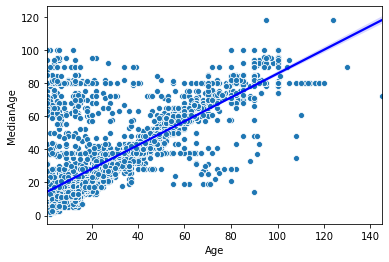

In [33]:
sns.scatterplot(x='Age', y='MedianAge', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='Age', y='MedianAge', data=SingleFamilyHome, scatter=False, color='b')

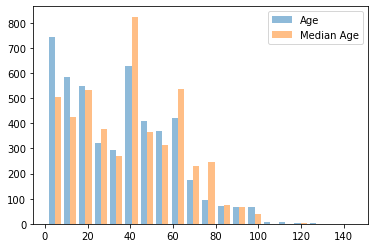

In [34]:
plt.hist([SingleFamilyHome.Age,SingleFamilyHome.MedianAge], bins=20, alpha=0.5, label=['Age','Median Age'])
plt.legend(loc='upper right')
plt.show()

In [35]:
# Drop YearBuilt and MedianYearBlt columns
SingleFamilyHome.drop(['YearBuilt','MedianYearBlt'],axis=1, inplace=True)

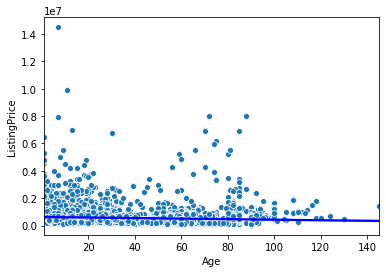

In [36]:
sns.scatterplot(x='Age', y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='Age', y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')

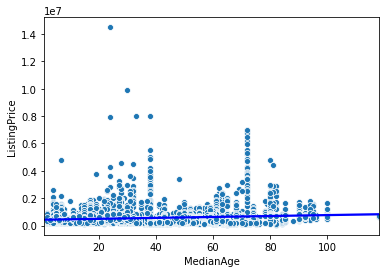

In [37]:
sns.scatterplot(x='MedianAge', y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='MedianAge', y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')

There is a small positive correlation between Median Age and house price which means for those subdivisions that have high median age the price is going up. This is happen because for those old subdivisions majority of house price comes from high lot price in these areas.

Text(0.5, 1.0, 'Scatter Plot for Listing Price vs Year Biult')

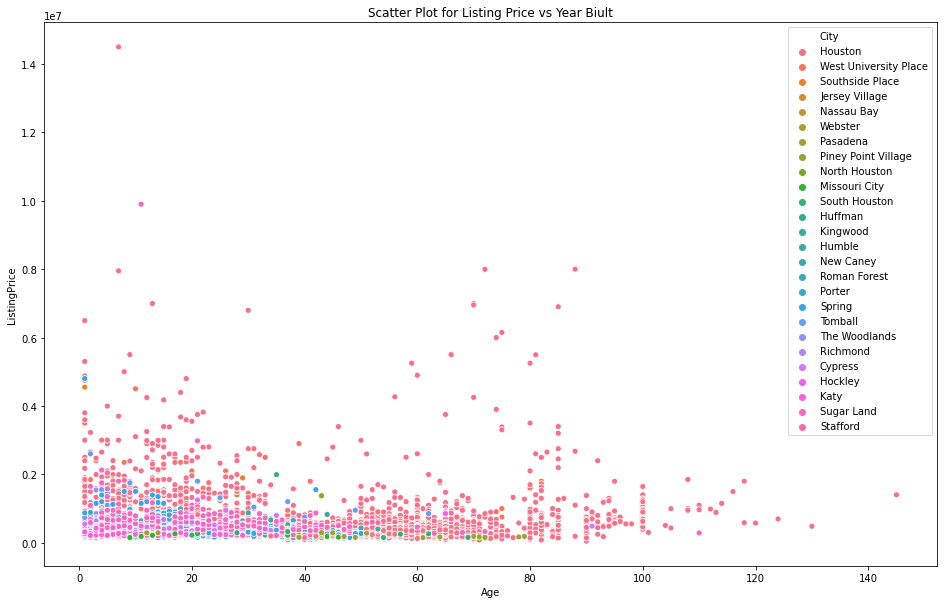

In [38]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='Age', y='ListingPrice', data=SingleFamilyHome,hue='City')
plt.title('Scatter Plot for Listing Price vs Year Biult')

### 2.4.2 Building Sqft<a id='2.4.2_Building_Sqft'></a>

In [39]:
SingleFamilyHome.BuildSqft.describe()

count     4805.000000
mean      2916.905307
std       1370.351881
min        680.000000
25%       2020.000000
50%       2620.000000
75%       3502.000000
max      21032.000000
Name: BuildSqft, dtype: float64

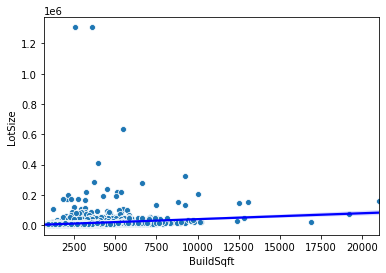

In [40]:
sns.scatterplot(x='BuildSqft', y='LotSize', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='LotSize', data=SingleFamilyHome, scatter=False, color='b')

In [41]:
SingleFamilyHome[SingleFamilyHome.BuildSqft > SingleFamilyHome.LotSize][['Address','BuildSqft','LotSize']]

,Address,BuildSqft,LotSize
0,1735 Eado Point Lane,1736,1428.0
1,619 Live Oak Street,2671,2006.0
4,602 Nagle Street,2392,2048.0
5,2618 Texas Street,2224,1464.0
6,3117 Leeland Street,1966,1829.0
...,...,...,...
3247,2617 Newman Street,3539,2500.0
3262,2714 Newman Street,4262,3500.0
3264,2624 Greenbriar Drive,3198,2500.0
3527,2849 Kings Retreat Circle,2783,1855.0


There are 162 houses where the building Sqft is higher than lot size. If we look at those houses in HAR.com it seems these houses do not have front yard and back yard that is why the building Sqft is higher than lot size.

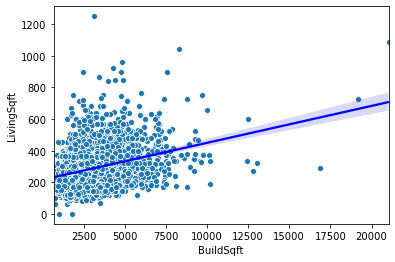

In [42]:
sns.scatterplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, scatter=False, color='b')

There are some outliers but there is no house with living area higher than building Sqft so let leave them for now.

In [43]:
SingleFamilyHome[SingleFamilyHome.LivingSqft > SingleFamilyHome.BuildSqft][['Address','BuildSqft','LivingSqft']]

,Address,BuildSqft,LivingSqft


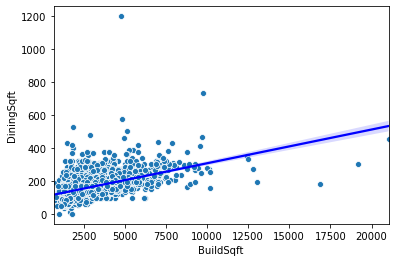

In [44]:
sns.scatterplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, scatter=False, color='b')

In [45]:
SingleFamilyHome[SingleFamilyHome.DiningSqft>400][['Address','BuildSqft','DiningSqft','LivingSqft']]

,Address,BuildSqft,DiningSqft,LivingSqft
89,2616 Quenby Avenue,5775,420.0,440.0
856,3465 Overbrook Lane Lane,9767,733.0,374.0
871,3429 Ella Lee Lane,4741,1200.0,551.0
957,5106 Southwind Street,1508,432.0,252.0
1105,9302 Sharpcrest Street,1780,420.0,120.0
1269,6 W Rivercrest Drive,21032,456.0,1088.0
1445,5360 Spring Park Street,5140,504.0,285.0
1507,5514 Russett Drive,9598,414.0,336.0
1581,6063 Crab Orchard Road,7843,432.0,540.0
1582,5737 Bayou Glen Road,7022,440.0,440.0


for 3429 Ella Lee Lane having 1200 sqft dining does not make sense , after I checked HAR.com I realized owner/agent entered 2 duplicated dimension for dining which I think it should be 600 sqft. and there is typo mistake for 1319 Mission Chase Drive.

In [46]:
SingleFamilyHome.loc[871,'DiningSqft'] = 600
SingleFamilyHome.loc[2541,'DiningSqft'] = 144
SingleFamilyHome.loc[1445,'DiningSqft'] = 252
SingleFamilyHome.loc[4334,'DiningSqft'] = 288

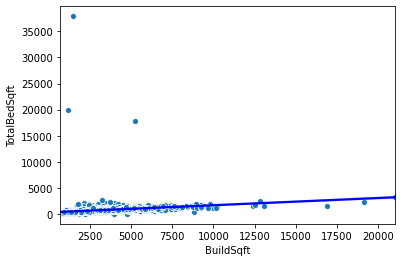

In [47]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')

In [48]:
SingleFamilyHome[SingleFamilyHome.TotalBedSqft>2000][['Address','BuildSqft','TotalBedSqft']]

,Address,BuildSqft,TotalBedSqft
332,515 W 14th Street,1135,19984.027778
943,5926 Southville Street,1478,37900.861111
1013,4814 Warm Springs Road,2132,2165.000000
1269,6 W Rivercrest Drive,21032,3235.000000
1276,10043 Cedar Creek Drive,3935,2056.000000
1777,3211 Ann Arbor Drive,3469,2092.000000
1802,11102 Maynard Place,5208,17775.000000
2112,7607 Bankside Drive,3691,2164.000000
2823,1802 Castlerock Drive,12821,2571.466667
4295,12023 Via Palazzo Lane,3239,2719.000000


In [49]:
SingleFamilyHome.loc[332,'TotalBedSqft'] = 290
SingleFamilyHome.loc[943,'TotalBedSqft'] = 671
SingleFamilyHome.loc[1013,'TotalBedSqft'] = 582
SingleFamilyHome.loc[1802,'TotalBedSqft'] = 1747

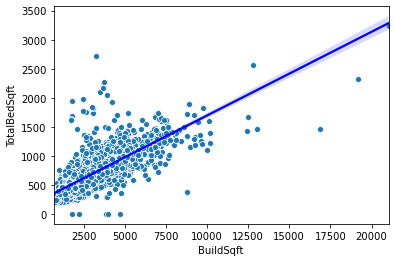

In [50]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')

In [51]:
SingleFamilyHome.to_csv('../data/processed/SingleFamilyFinal.csv',index=False)